In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

def compute_scales(W_):
    W = normalize(W_)
    gc = W.shape[1]
    scales = np.zeros(gc)
    for i in range(gc):
        f = (W[:,i] > 0.5).astype(float)
        df = f[1:] - f[:-1]
        ind = np.where(df == -1.)[0]
        ind = ind.astype(float)
        if len(ind) > 1:
            scales[i] = np.mean(ind[1:] - ind[:-1])
        else:
            scales[i] = 0

    return scales

def normalize(W):
    W_ = W - np.amin(W)
    W_ = W_/np.amax(W_, axis=0, keepdims=True)
    return W_



In [2]:
filename = "Pretraining_trace.pkl"
with open(filename, 'rb') as f:
    data_ = pickle.load(f)
    
data = data_[:,100:500]
print(data.shape)

(100000, 400)


In [3]:
# # start = 25000
# start = 41000
# end = start + 300

# W = data_[start:end,:] 
# plt.imshow(W)

# for _ in range(60):
    
#     start = np.random.choice(100000-1000)
#     end = start + 300

#     W = data_[start:end,:] 
#     plt.title("{} : {}".format(start, end))
#     plt.yticks(np.arange(301, step=300//4), np.arange(start, end+1, step=300//4))
#     plt.imshow(W)
#     plt.show()

scales = []
for i in np.arange(0,len(data),step=1000):
    start = int(i)
    end = start + 200
    W = data[start:end,:]
    scales.append(compute_scales(W))

scales = np.array(scales) 

(400,) (400,) (391,)


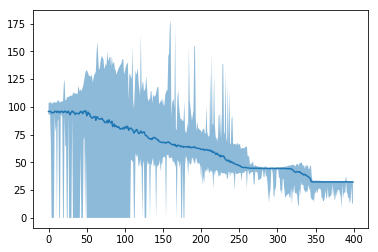

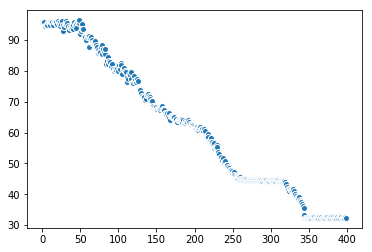

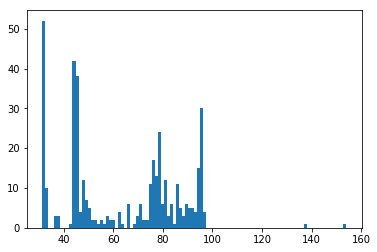

In [5]:
mu  = np.mean(scales, axis=0)
std = np.std(scales - mu, axis=0)

x = np.arange(data.shape[1])

# plt.plot(x,std)
# plt.fill_between(x, mu - std, mu + std, alpha=0.5)
plt.fill_between(x, np.amin(scales, axis=0),np.amax(scales, axis=0), alpha=0.5)
plt.plot(mu)
ok = scales >= 1.
print(ok[0].shape, x.shape, x[ok[0]].shape )
plt.show()

plt.scatter(x,mu, edgecolor="white")
# plt.scatter(x[ok[0]], scales[0,ok[0]], edgecolor="white")
# plt.plot(x[ok[0]], scales[0,ok[0]], marker='o')
plt.show()

# plt.plot(scales[2])
# plt.hist(scales[0,ok[0]], bins=100);
# plt.hist(scales[1,ok[1]], bins=100);
plt.hist(scales[2,ok[2]], bins=100);
plt.show()
# # print(scales.shape)
# # print(np.concatenate(scales).shape)
# combined_scales = np.concatenate(scales)
# combined_scales = combined_scales[combined_scales>=0.]
# # plt.hist(combined_scales, bins=100);

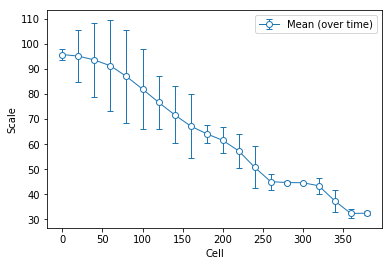

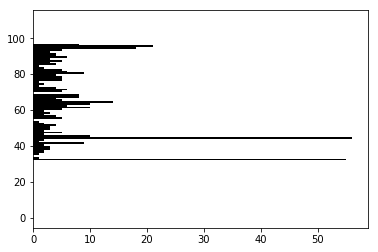

In [41]:
sub = np.arange(400,step=10)
# x_ = np.arange(400)
x_ = np.zeros(400)
x_[sub] = 1.
x_ = x_.astype(bool)

plt.ylabel("Scale")
plt.xlabel("Cell")



# # print(sub)
# for _ in range(50):
#     i = np.random.choice(100)
# #     plt.plot(x[ok[i]],scales[i,ok[i]], color="silver", alpha=.1, marker="s", linestyle="none")

#     plt.plot(x[ok[i] * x_], 
#              scales[i, ok[i]*x_], color="silver", linewidth=2., alpha=1.)

# i = np.random.choice(100)
# #     plt.plot(x[ok[i]],scales[i,ok[i]], color="silver", alpha=.1, marker="s", linestyle="none")

# # plt.plot(x[ok[i] * x_], 
#              scales[i, ok[i]*x_], color="silver", alpha=1., label="Example snapshots")



sub = np.arange(400,step=20)
# plt.plot(x[sub],scales[4, sub], color="black", linestyle="--", marker="o", markerfacecolor="white", label="Example snapshot")
# plt.plot(x[sub], mu[sub], color="black", marker="o", linestyle="-", linewidth=2,  markerfacecolor="white", label="Mean (over time)")
plt.errorbar(x[sub], mu[sub], yerr=std[sub], color="C0", 
#              marker="o", 
             fmt='--o',
             capsize=3 ,
             linestyle="-", linewidth=1,  markerfacecolor="white", label="Mean (over time)")


# plt.plot(x[0], mu[0], color="black", marker="|")
# plt.plot(x[-1], mu[-1], color="black", marker="d")
plt.legend()
plt.show()

i = 4

plt.hist(mu, bins=np.arange(111, step=1), color="black", orientation='horizontal');
plt.show()
# plt.plot(scales[i, sub ], color="black", linestyle="-", marker="o", markerfacecolor="white", label="Example snapshot")

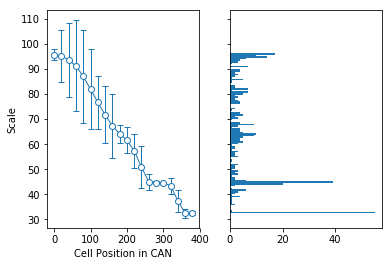

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.set_ylabel("Scale")
ax1.set_xlabel("Cell Position in CAN")
ax1.errorbar(x[sub], mu[sub], yerr=std[sub], color="C0", 
#              marker="o", 
             fmt='--o',
             capsize=3 ,
             linestyle="-", linewidth=1,  markerfacecolor="white", label="Mean (over time)")


ax2.hist(mu, bins=100, color="C0", orientation='horizontal');

plt.savefig("pre_training_scales.png")